In [262]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import shap

In [324]:
import numpy as np

# Set the number of features and instances
num_features = 10
num_instances = 10000

# Generate random values for each feature for each instance
dataset = np.random.randint(2, size=(num_instances, num_features))

# Generate labels based on the condition that features 0 AND 3 AND 8 are equal to 1
labels_and = np.logical_and(dataset[:, 0] == 1, dataset[:, 3] == 1).astype(int)
labels_and = np.logical_and(labels_and, dataset[:, 4] == 1).astype(int)
labels_and = np.logical_and(labels_and, dataset[:, 7] == 1).astype(int)

# Generate labels based on the condition that features 0 OR 3 OR 8 are equal to 1
labels_or = np.logical_or(dataset[:, 0] == 1, dataset[:, 3] == 1).astype(int)
labels_or = np.logical_or(labels_or, dataset[:, 4] == 1).astype(int)
labels_or = np.logical_or(labels_or, dataset[:, 7] == 1).astype(int)

# Indices of instances with label 1 and label 0 for each condition
indices_label1_and = np.where(labels_and == 1)[0]
indices_label0_and = np.where(labels_and == 0)[0]

indices_label1_or = np.where(labels_or == 1)[0]
indices_label0_or = np.where(labels_or == 0)[0]

# Select equal number of instances with label 1 and label 0 for each condition
num_samples_per_label = min(len(indices_label1_and), len(indices_label0_and))
balanced_indices_and = np.concatenate((indices_label1_and[:num_samples_per_label], indices_label0_and[:num_samples_per_label]))

num_samples_per_label = min(len(indices_label1_or), len(indices_label0_or))
balanced_indices_or = np.concatenate((indices_label1_or[:num_samples_per_label], indices_label0_or[:num_samples_per_label]))

# Create balanced datasets
balanced_dataset_and = dataset[balanced_indices_and]
balanced_labels_and = labels_and[balanced_indices_and]

balanced_dataset_or = dataset[balanced_indices_or]
balanced_labels_or = labels_or[balanced_indices_or]

In [325]:
len(balanced_labels_and)

1298

In [326]:
len(balanced_labels_or)

1128

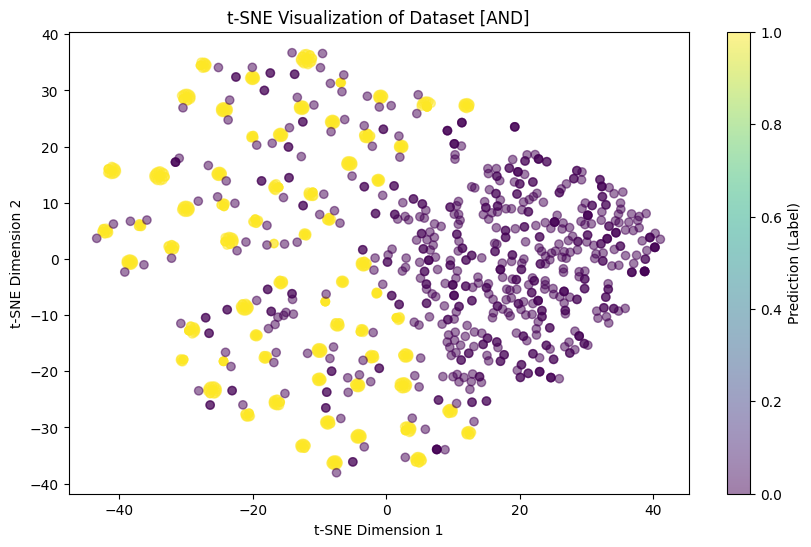

In [327]:
# Perform dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
embedded_dataset = tsne.fit_transform(balanced_dataset_and)


# Plot the embedded dataset
plt.figure(figsize=(10, 6))
plt.scatter(embedded_dataset[:, 0], embedded_dataset[:, 1], c=balanced_labels_and, cmap='viridis', alpha=0.5)
plt.title('t-SNE Visualization of Dataset [AND]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Prediction (Label)')
plt.show()

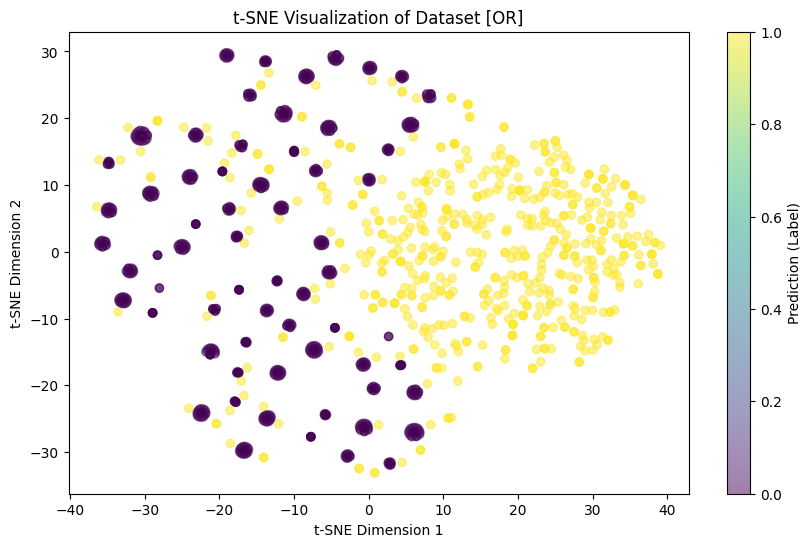

In [328]:
# Plot the embedded dataset
embedded_dataset = tsne.fit_transform(balanced_dataset_or)

plt.figure(figsize=(10, 6))
plt.scatter(embedded_dataset[:, 0], embedded_dataset[:, 1], c=balanced_labels_or, cmap='viridis', alpha=0.5)
plt.title('t-SNE Visualization of Dataset [OR]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Prediction (Label)')
plt.show()

In [329]:
def train_and_visualize(dataset, labels):
    # Split dataset into train and test sets
    train_ratio = 0.7
    num_train = int(train_ratio * len(labels))
    train_data = dataset[:num_train]
    train_labels = labels[:num_train]
    test_data = dataset[num_train:]
    test_labels = labels[num_train:]

    # Train Random Forest model
    model = RandomForestClassifier(n_estimators=100)
    model.fit(train_data, train_labels)
    
    # Compute SHAP values
    explainer = shap.Explainer(model, train_data)
    shap_values = explainer.shap_values(test_data)
    
    shap.summary_plot(shap_values[1], test_data, plot_type='dot')

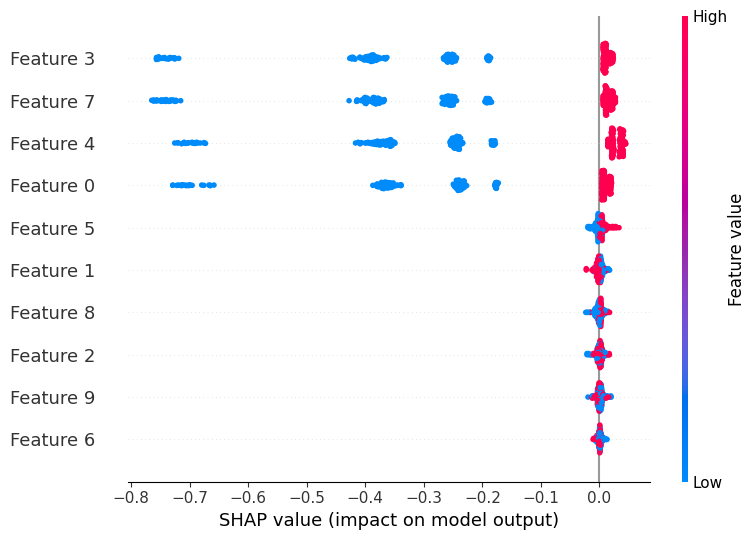

In [330]:
# Train and visualize SHAP explanations for the AND condition dataset
train_and_visualize(balanced_dataset_and, balanced_labels_and)

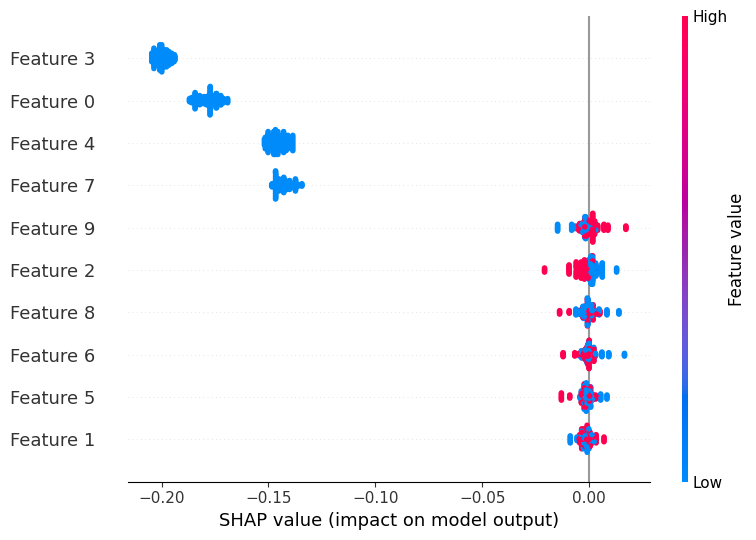

In [331]:
# Train and visualize SHAP explanations for the OR condition dataset
train_and_visualize(balanced_dataset_or, balanced_labels_or)